#### Get Longitude, Latitude, and HDOP from GGA

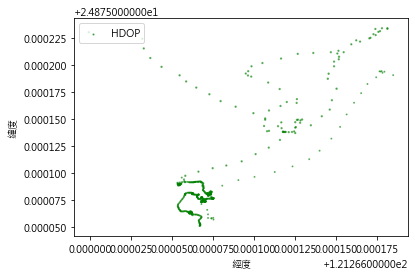

In [2]:
def checkSum(msg):
    try:
        data = msg[msg.index('$')+1:msg.index('*')]
        cs = 0
        for c in data:
            cs = cs ^ ord(c)
        return cs == int(msg[msg.index('*')+1:], 16)
    except:
        return False


def parseGGA(data):
    try:
        if not checkSum(data):
            return None
        values = data.split(',')
        gga = dict()
        gga['UTC'] = f'{values[1][0:2]}:{values[1][2:4]}:{values[1][4:]}'
        gga['Latitude'] = (float(values[2][0:2]) + (float(values[2][2:])/60)
                           ) * (1 if values[3].upper() == 'N' else -1)
        gga['N/S'] = values[3]
        gga['Longitude'] = (float(values[4][0:3]) + (float(values[4][3:])/60)
                            ) * (1 if values[5].upper() == 'E' else -1)
        gga['E/W'] = values[5]
        gga['Fix'] = ['invalid', 'valid', 'DGPS', 'PPS', 'RTK',
                      'not supported', 'estimated', 'Manual', 'Simulation'][int(values[6])]
        gga['Satellites'] = int(values[7])
        gga['HDOP'] = float(values[8])
        gga['Altitude'] = float(values[9])
        gga['Alt Unit'] = values[10]
        gga['Geoid Separation'] = float(values[11])
        gga['GS Unit'] = values[12]
        gga['Checksum'] = values[14]
        return gga
    except:
        return None


# load GPS logs
x = []
y = []
s = []
with open('gps_log2.txt', 'r') as f:
    logs = f.readlines()
    gga_msgs = list(filter(lambda log: 'GGA' in log, logs))
    for msg in gga_msgs:
        gga = parseGGA(msg)
        if gga:
            # print(gga["Longitude"], gga["Latitude"], gga["HDOP"])
            x = x + [gga["Longitude"]]
            y = y + [gga["Latitude"]]
            s = s + [gga["HDOP"]]

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(x, y, s, c="g", alpha=0.5, marker="o",
            label="HDOP")
plt.xlabel("經度")
plt.ylabel("緯度")
plt.legend(loc='upper left')
plt.show()